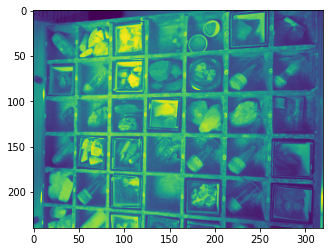

(240, 320)


In [7]:
import numpy as np
import cv2
import cv2 as cv

filename = '/home/ruizhu/Documents/Projects/pytorch-superpoint/datasets/HPatches/v_samples/1.ppm'
image = cv2.imread(filename)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

sizer = np.array([240, 320])
s = max(sizer /gray.shape[:2])
gray = gray[:int(sizer[0]/s),:int(sizer[1]/s)]
gray = cv2.resize(gray, (sizer[1], sizer[0]),
                         interpolation=cv2.INTER_AREA)
gray = gray.astype('float32') / 255.0
if image.ndim == 2:
    gray = gray[:,:, np.newaxis]

image = image[:int(sizer[0]/s),:int(sizer[1]/s)]
image = cv2.resize(image, (sizer[1], sizer[0]),
                         interpolation=cv2.INTER_AREA)
image = image.astype('float32') / 255.0

import matplotlib.pyplot as plt
plt.imshow(gray)
plt.show()
print(gray.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(240, 320)


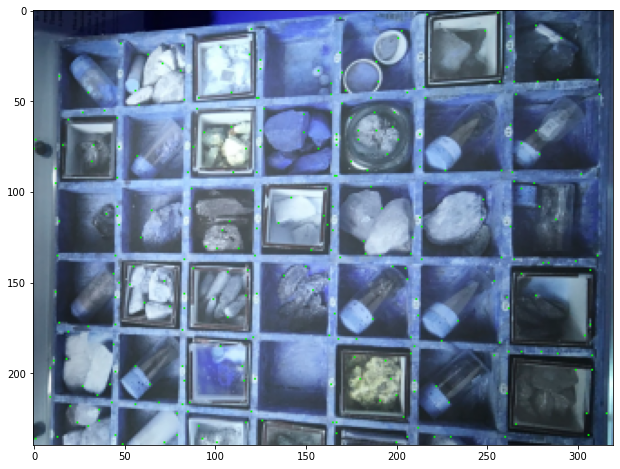

(240, 320, 3)


In [8]:
# find Harris corners
gray = np.float32(gray)
print(gray.shape)

dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
# find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
# image[res[:,1],res[:,0]]=[0,0,255]
image[np.clip(res[:,3], 0, 239),res[:,2]] = [0,255,0]
# cv.imwrite('subpixel5.png',img)
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.imshow(image)
plt.show()
print(image.shape)

In [54]:
print(centroids.shape, corners.shape)

(321, 2) (321, 2)


In [12]:
np.amax(corners[:, 1])

241.81572